In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bear-classificator/pytorch/default/1/export.pkl


In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *

from fastdownload import download_url

! pip install -Uqq duckduckgo_search
from duckduckgo_search import DDGS
from fastcore.all import *
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.4 MB/s eta 0:00:00:00:01


In [3]:
#hide: these are the things needed to deploy the model as an app? 
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.3 MB/s eta 0:00:0000:01:00:01
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK


In [4]:
# loading the bear classifier model I previously trained 
learn = load_learner('/kaggle/input/bear-classificator/pytorch/default/1/export.pkl')

Searching for grizzly bear


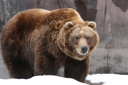

In [5]:
# I need a bear image to test the performance of the model

def search_images(keywords, max_images=30): # 30 is the default the user shared. I may change it
    print(f"Searching for {keywords}")
    return L(DDGS().images(keywords,max_results=max_images)).itemgot('image')

results = search_images('grizzly bear')
ims = [results[0]]

dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
# using the model to do inference

pred,pred_idx,probs = learn.predict('images/grizzly.jpg')

In [7]:
labels = learn.dls.vocab # these are the labels used when training the model (the categories defined when creating the DataLoaders)

# function that uses the model to infere the type of bear in an image
def predict(img):
    img = PILImage.create(img)
    img.resize((128,128))
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))} # returns the probability for each type of bear

In [8]:
# now, install Gradio to start the deploying process

!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 27.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [9]:
import gradio as gr

In [10]:
!pip show gradio

Name: gradio
Version: 5.13.2
Summary: Python library for easily interacting with trained machine learning models
Home-page: https://github.com/gradio-app/gradio
Author: 
Author-email: Abubakar Abid <gradio-team@huggingface.co>, Ali Abid <gradio-team@huggingface.co>, Ali Abdalla <gradio-team@huggingface.co>, Dawood Khan <gradio-team@huggingface.co>, Ahsen Khaliq <gradio-team@huggingface.co>, Pete Allen <gradio-team@huggingface.co>, Ömer Faruk Özdemir <gradio-team@huggingface.co>, Freddy A Boulton <gradio-team@huggingface.co>, Hannah Blair <gradio-team@huggingface.co>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiofiles, anyio, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, jinja2, markupsafe, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, ruff, safehttpx, semantic-version, starlette, tomlkit, typer, typing-extensions, uvicorn
Required-by: 


In [11]:
# using these lines, we can create the interface to use the functionality given by "predict" function
gr.Interface(fn=predict, 
             inputs=gr.components.Image(), 
             outputs=gr.components.Label(num_top_classes=3)).launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://f87752bfa4b17e88b0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
title = "Bears Classifier"
description = "This classifies a bear from a picture of it."
enable_queue = True

gr.Interface(fn=predict,
             inputs=gr.components.Image(),
             outputs=gr.components.Label(num_top_classes=3),
             title=title,
             description=description).launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://8259e89adfc9dcac4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
